In [1]:
import pandas as pd

In [4]:
# tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
# tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')

In [5]:
# tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [6]:
# tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [7]:
# df = pd.concat([tmp, tmp_2])

In [8]:
# X = df.loc[:, df.columns!='Personality (Class label)']

In [9]:
# y = df.loc[:, df.columns=='Personality (Class label)']

In [12]:
# male_df = df[df['Gender'] == 'Male']

In [13]:
# female_df = df[df['Gender'] == 'Female']

In [14]:
# # getting all the columns
# cols = set(male_df.columns)
 
# # removing the desired column
# cols.remove('Personality (Class label)')
# cols.remove('Gender')
# cols = list(cols)
# X_male = male_df[cols]
# y_male = male_df.loc[:, male_df.columns=='Personality (Class label)']

In [15]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_male, y_male,
#                                                     stratify=y_male, 
#                                                     test_size=0.30)

In [16]:
def df_load_and_split(gender='male'):
    tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    df = pd.concat([tmp, tmp_2])
    if gender == 'male':
        df = df[df['Gender'] == 'Male']
    else:
        df = df[df['Gender'] == 'Female']
    cols = set(df.columns)
    cols.remove('Personality (Class label)')
    cols.remove('Gender')
    cols = list(cols)
    X = df[cols]
    y = df.loc[:, df.columns=='Personality (Class label)']
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.30)
    return (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = df_load_and_split('male')

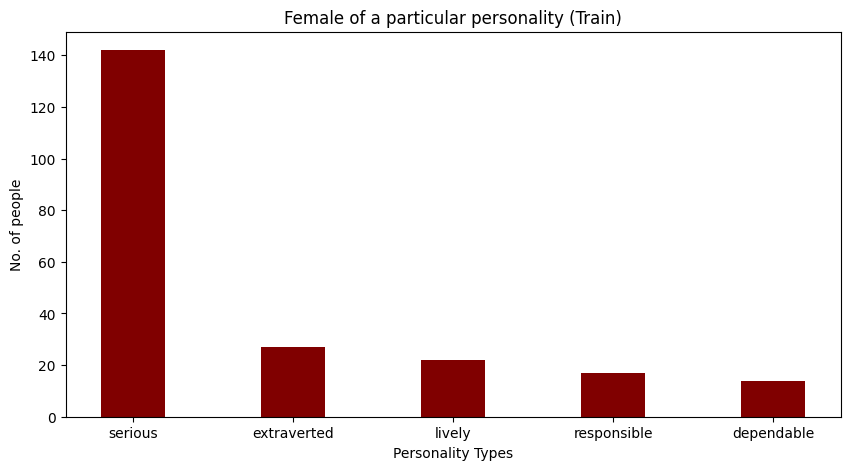

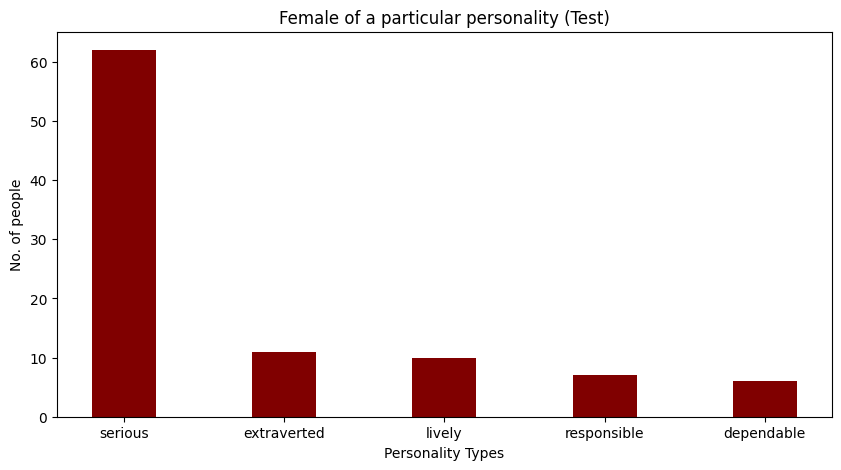

In [17]:
def draw_bars(X_train, X_test, y_train, y_test, gender='male'):
    import matplotlib.pyplot as plt
    for i in y_train, y_test:
        tmp = i.value_counts() # .count()
        fig = plt.figure(figsize = (10, 5))
        # creating the bar plot
        plt.bar(list(i['Personality (Class label)'].value_counts()._get_axis(axis=0)),
                list(i['Personality (Class label)'].value_counts()), color ='maroon',
                width = 0.4)

        plt.xlabel("Personality Types")
        plt.ylabel("No. of people")

        if len(i) == len(y_train):
            tmp = gender.title() + " of a particular personality (Train)"
            plt.title(tmp)
        else:
            tmp = gender.title() + " of a particular personality (Test)"
            plt.title(tmp)

        plt.show()
        
draw_bars(X_train, X_test, y_train, y_test, 'female')

In [18]:
X_train

,agreeableness,openness,Age,neuroticism,conscientiousness,extraversion
31,2,6,24,2,5,2
1,2,5,17,4,5,4
309,5,4,22,4,7,6
281,4,7,19,7,4,5
146,6,3,19,4,5,6
...,...,...,...,...,...,...
61,6,6,26,4,6,4
254,5,6,20,4,8,5
251,5,4,20,7,3,4
253,5,6,17,6,2,6


In [19]:
y_train

,Personality (Class label)
31,lively
1,serious
309,serious
281,extraverted
146,serious
...,...
61,serious
254,serious
251,responsible
253,extraverted


In [22]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(y_train):
    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding on 'team' column 
    encoder_df = pd.DataFrame(encoder.fit_transform(y_train).toarray())

    #merge one-hot encoded columns back with original DataFrame
    # final_df = df.join(encoder_df)

    #view final df
    encoder_df.columns = encoder.categories_

    return encoder_df

one_hot_encode(y_test)

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
91,0.0,0.0,0.0,0.0,1.0
92,0.0,0.0,0.0,0.0,1.0
93,0.0,0.0,0.0,0.0,1.0
94,0.0,0.0,0.0,0.0,1.0


In [23]:
def get_val(row, data):
    tmp = []
    for i in one_hot_encode(data).columns:
        tmp.append(str(i[0]))
    for i in range(len(row)):
        if row[i]==1:
            return tmp[i]
            
get_val([0, 0, 0, 1.0, 0], y_test)

'responsible'

In [24]:
y_train

,Personality (Class label)
31,lively
1,serious
309,serious
281,extraverted
146,serious
...,...
61,serious
254,serious
251,responsible
253,extraverted


In [32]:
# y_train = one_hot_encode(y_train)

In [33]:
# y_test = one_hot_encode(y_test)

In [56]:
X = X_train + X_test
y = y_train + y_test 

In [68]:
# y['Personality (Class label)']

In [69]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

y['Personality (Class label)'] = label_encoder.fit_transform(y['Personality (Class label)'].astype(str))

In [74]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(
    # max_features=5,
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100, '%', sep='')



# # Egula added
# from sklearn.model_selection import cross_val_score

# # Multiply by -1 since sklearn calculates *negative* MAE
# scores = -1 * cross_val_score(clf, X, tmp+tmp_2,
#                               cv=5,
#                               scoring='neg_mean_absolute_error')

# print("MAE scores:\n", scores)

Accuracy: 89.58333333333334%


In [35]:
X_train, X_test, y_train, y_test = df_load_and_split('male')

In [37]:
from sklearn import svm
clf = svm.SVC(
 C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100, '%', sep='')



Accuracy: 64.58333333333334%


/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

clf = KNeighborsClassifier(leaf_size=5, p=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')




Accuracy: 69.79166666666666%


In [39]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', 
                    solver='adam', alpha=0.00001, batch_size='auto', 
                    learning_rate='constant', learning_rate_init=0.001, 
                    power_t=0.5, max_iter=20000, shuffle=True, random_state=42, 
                    tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                    nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                    epsilon=1e-08, n_iter_no_change=100, max_fun=15000)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

Accuracy: 97.91666666666666%


In [40]:
from sklearn.gaussian_process import GaussianProcessClassifier

clf = GaussianProcessClassifier(kernel=None, optimizer='fmin_l_bfgs_b', 
                                n_restarts_optimizer=0, max_iter_predict=100, 
                                warm_start=False, copy_X_train=True, 
                                random_state=42, multi_class='one_vs_rest', 
                                n_jobs=None)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

Accuracy: 91.66666666666666%


In [41]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, min_samples_split=30, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

Accuracy: 73.95833333333334%


In [42]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(learning_rate=0.01, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

Accuracy: 64.58333333333334%


In [43]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

Accuracy: 73.95833333333334%


In [44]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=60, tol=0.1, max_iter=1000000, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

Accuracy: 76.04166666666666%


In [47]:
# from sklearn.svm import NuSVC

# clf = NuSVC(random_state=42)

# clf = clf.fit(X_train,np.ravel(y_train))

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

# print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

In [48]:
from sklearn import svm
clf = svm.SVC(
 C=100000.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
    shrinking=True, probability=False, tol=0.001, cache_size=200, 
    random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

Accuracy: 87.5%


In [49]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

Accuracy: 79.16666666666666%


In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

Accuracy: 80.20833333333334%


In [51]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, 
                                 n_estimators=100, subsample=1.0, 
                                 criterion='friedman_mse', 
                                 min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_depth=3, 
                                 min_impurity_decrease=0.0, init=None, 
                                 random_state=42, max_features=None, 
                                 verbose=0, max_leaf_nodes=None, 
                                 warm_start=False, validation_fraction=0.1, 
                                 n_iter_no_change=None, tol=0.0001, 
                                 ccp_alpha=0.0)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

Accuracy: 91.66666666666666%


In [52]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(
    # max_features=5,
    criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
    random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, 
    class_weight=None, ccp_alpha=0.0
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

Accuracy: 87.5%


In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

# Build the model
model = Sequential()
model.add(Dense(1000, input_dim=6, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, tmp, epochs=100, batch_size=8, validation_data=(X_test, tmp_2))

2023-03-17 13:11:50.248965: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 13:12:15.917292: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-17 13:12:15.918304: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-17 13:12:15.918377: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Epoch 1/100
28/28 [==============================] - 3s 27ms/step - loss: 1.3287 - accuracy: 0.5631 - val_loss: 1.1145 - val_accuracy: 0.6458
Epoch 2/100
28/28 [==============================] - 0s 17ms/step - loss: 1.0988 - accuracy: 0.6486 - val_loss: 1.1398 - val_accuracy: 0.6458
Epoch 3/100
28/28 [==============================] - 0s 17ms/step - loss: 1.0126 - accuracy: 0.6622 - val_loss: 1.0493 - val_accuracy: 0.6771
Epoch 4/100
28/28 [==============================] - 0s 16ms/step - loss: 1.0622 - accuracy: 0.7252 - val_loss: 1.2459 - val_accuracy: 0.6458
Epoch 5/100
28/28 [==============================] - 0s 17ms/step - loss: 0.9843 - accuracy: 0.6847 - val_loss: 0.9985 - val_accuracy: 0.7188
Epoch 6/100
28/28 [==============================] - 0s 16ms/step - loss: 0.9047 - accuracy: 0.7162 - val_loss: 0.8623 - val_accuracy: 0.7396
Epoch 7/100
28/28 [==============================] - 1s 19ms/step - loss: 0.8774 - accuracy: 0.6937 - val_loss: 0.8406 - val_accuracy: 0.7604
Epoch 

In [54]:
2

2